<a href="https://colab.research.google.com/github/hyz218/Dacon_baseball/blob/master/Dacon_baseball_regular_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import numpy as np
import pandas as pd
import platform
import re
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
base_path = '/content/drive/MyDrive/Colab Notebooks/KBO_prediction_data/'
pre_df = pd.read_csv(base_path+'Pre_Season_Batter.csv')
regular_df = pd.read_csv(base_path+'Regular_Season_Batter.csv')

In [3]:
regular_df.head()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,0,8,95,34,5,0,9,8,25,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,3,1,30,7,0,0,13,2,28,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,4,2,101,27,4,3,40,5,58,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,2,1,26,7,0,0,8,2,30,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


In [4]:
regular_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   batter_id        2454 non-null   int64  
 1   batter_name      2454 non-null   object 
 2   year             2454 non-null   int64  
 3   team             2454 non-null   object 
 4   avg              2428 non-null   float64
 5   G                2454 non-null   int64  
 6   AB               2454 non-null   int64  
 7   R                2454 non-null   int64  
 8   H                2454 non-null   int64  
 9   2B               2454 non-null   int64  
 10  3B               2454 non-null   int64  
 11  HR               2454 non-null   int64  
 12  TB               2454 non-null   int64  
 13  RBI              2454 non-null   int64  
 14  SB               2454 non-null   int64  
 15  CS               2454 non-null   int64  
 16  BB               2454 non-null   int64  
 17  HBP           

In [5]:
regular_df.describe()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,84.279136,27.788509,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,82.854200,29.602966,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,10.000000,3.000000,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,56.000000,17.000000,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,146.000000,44.000000,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,377.000000,146.000000,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


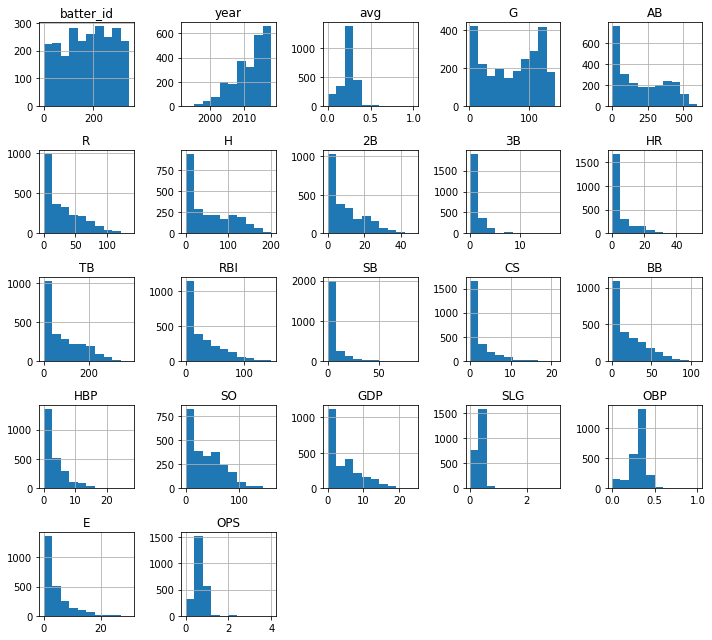

In [6]:
regular_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50672 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46020 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51473 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50521 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44050 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph

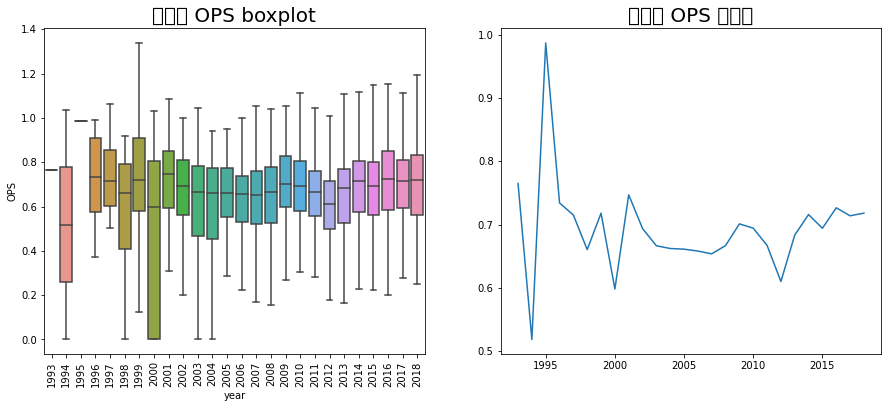

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
g = sns.boxplot(x="year",y="OPS",data=regular_df,showfliers=False)
g.set_title("연도별 OPS boxplot",size=20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
plt.subplot(1,2,2)
plt.plot(regular_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값',size=20)
plt.show()

In [8]:
pd.crosstab(regular_df['year'],'count').T #연도별 기록의 수

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,54,68,73,85,98,115,124,130,151,174,194,186,207,213,217,227


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54016 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44368 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 46160 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49328 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47215 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

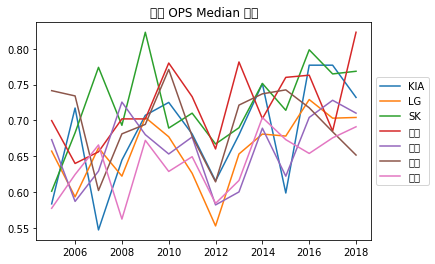

In [9]:
#연도별 팀별 OPS 중앙값 계산
team_OPS = regular_df.pivot_table(index=['team'],columns='year',values='OPS',aggfunc='median')

#2005년 이후 결측치 존재하지 않는 팀만 확인
team_idx = team_OPS.loc[:,2005:].isna().sum(axis=1)<=0

plt.plot(team_OPS.loc[team_idx,2005:].T)
plt.legend(team_OPS.loc[team_idx,2005:].T.columns,loc='center left',bbox_to_anchor=(1,0.5))
plt.title('팀별 OPS Median 비교')
plt.show()

In [10]:
#선수의 체격별 OPS 비교
regular_df['height'] = regular_df['height/weight'].apply(lambda x: int(re.findall('\d+',x.split('/')[0])[0]) if pd.notnull(x) else x)
regular_df['weight'] = regular_df['height/weight'].apply(lambda x: int(re.findall('\d+',x.split('/')[1])[0]) if pd.notnull(x) else x)

print(regular_df['height/weight'][0], regular_df['height'][0], regular_df['weight'][0])

177cm/93kg 177.0 93.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47800 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47924 missing from current font.

/usr/local/lib/python3.7/dist-p

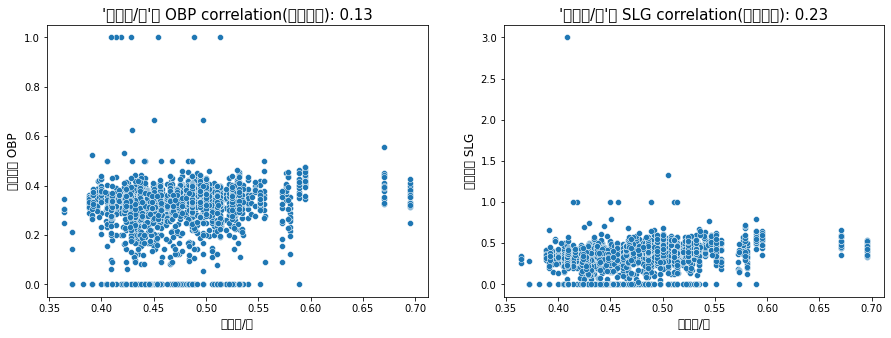

In [11]:
regular_df['weight_per_height'] = regular_df['weight']/regular_df['height']
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1) 

# 몸무게/키와 OBP(출루율) correlation
correlation = regular_df['weight_per_height'].corr(regular_df['OBP'])
sns.scatterplot(regular_df['weight_per_height'], regular_df['OBP'])
plt.title("'몸무게/키'와 OBP correlation(상관관계): " + str(np.round(correlation, 2)),fontsize=15)
plt.ylabel('정규시즌 OBP',fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.subplot(1, 2, 2)

# 몸무게/키와 SLG(장타율) correlation
correlation = regular_df['weight_per_height'].corr(regular_df['SLG'])
sns.scatterplot(regular_df['weight_per_height'], regular_df['SLG'])
plt.title("'몸무게/키'와 SLG correlation(상관관계): " + str(np.round(correlation, 2)),fontsize=15)
plt.ylabel('정규시즌 SLG', fontsize=12)
plt.xlabel('몸무게/키', fontsize=12)
plt.show()

#체격과 타율의 상관관계는 없음

In [12]:
# 포지션별 좌타자 / 우타자 여부 확인
regular_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
외야수(우투양타)      7
내야수(우투양타)      7
Name: position, dtype: int64

In [13]:
# 양타 선수 확인
regular_df.loc[regular_df['position']=='내야수(우투양타)','batter_name'].unique()

array(['황진수'], dtype=object)

In [14]:
# 양타 선수 확인
regular_df.loc[regular_df['position']=='외야수(우투양타)','batter_name'].unique()

array(['국해성', '로하스'], dtype=object)

In [15]:
#수비 위치 column 추가
regular_df['pos'] = regular_df['position'].apply(lambda x: x.split('(')[0] if pd.notnull(x) else x)

#타석 방향(좌타/우타/양타) column 추가
regular_df['hit_way'] = regular_df['position'].apply(lambda x: x[-3:-1] if pd.notnull(x) else x)

print(regular_df['position'][0], regular_df['pos'][0], regular_df['hit_way'][0])

내야수(우투우타) 내야수 우타


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54252 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51648 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49496 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48324 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45236 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50556 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49688 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

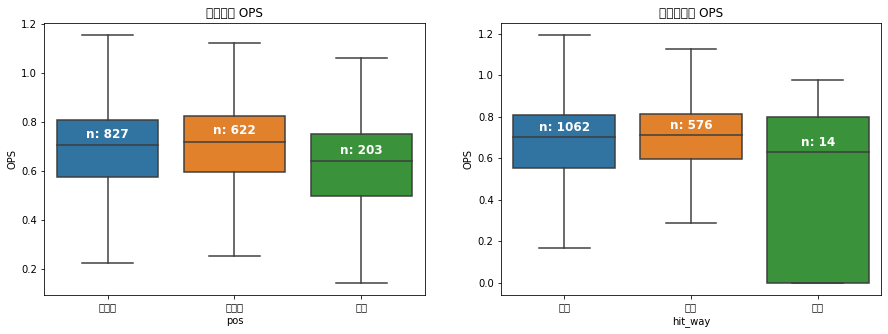

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.boxplot(x='pos', y='OPS', data = regular_df, showfliers=False)

# position별 OPS median
medians = regular_df.groupby(['pos'])['OPS'].median().to_dict()

# position별 관측치 수
num = regular_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in num: num[key] = "n: " + str(num[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), 
            medians[label.get_text()] + 0.03, num[label.get_text()],
            horizontalalignment='center', size='large', color='w', weight='semibold')
ax.set_title('포지션별 OPS')

plt.subplot(1,2,2)
ax = sns.boxplot(x='hit_way', y='OPS', data = regular_df, showfliers=False)

# 타석 방향별 OPS median
medians = regular_df.groupby(['hit_way'])['OPS'].median().to_dict()
# 타석 방향 관측치 수
num = regular_df['hit_way'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환
for key in num: num[key] = "n: " + str(num[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03,
            num[label.get_text()], horizontalalignment='center', size='large',
            color='w', weight='semibold')
ax.set_title('타석방향별 OPS')

plt.show()
#포수를 제외하고는 OPS 차이가 크지 않음, 양손으로 타격하는 타자의 경우는 n=14이고, 실제 해당하는 선수는 3명으로 신뢰하기 어려운 수치임